<a href="https://colab.research.google.com/github/vedharshita/Detecting-Mental-Workload-in-Virtual-Reality/blob/main/5_DNN_%26Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Mounting gdrive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Imports
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
!ls

drive  sample_data


In [ ]:
## Setting path for data files on colab
root_dir = "/content/drive/MyDrive/VR Mental Workload/"
raw_dir = root_dir + "data/VRData2019/"
model_file_dir = raw_dir + "model_file_dir/"
os.chdir(model_file_dir)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,nback,signal_1_Alpha,signal_1_Beta,signal_1_Delta,signal_1_Gamma,signal_1_Theta,signal_2_Delta,signal_2_Theta,signal_2_Alpha,signal_2_Beta,signal_2_Gamma,signal_3_Delta,signal_3_Theta,signal_3_Alpha,signal_3_Beta,signal_3_Gamma,signal_4_Delta,signal_4_Theta,signal_4_Alpha,signal_4_Beta,signal_4_Gamma,signal_5_Delta,signal_5_Theta,signal_5_Alpha,signal_5_Beta,signal_5_Gamma,signal_6_Delta,signal_6_Theta,signal_6_Alpha,signal_6_Beta,signal_6_Gamma,signal_7_Delta,signal_7_Theta,signal_7_Alpha,signal_7_Beta,signal_7_Gamma,signal_8_Delta,signal_8_Theta,signal_8_Alpha,signal_8_Beta,signal_8_Gamma
0,0,0,0.0,0.266018,0.294520,0.385813,0.410344,0.253298,0.383796,0.253239,0.210673,0.301570,0.817269,0.060986,0.131818,0.158013,0.347443,0.638562,0.223512,0.340940,0.283580,0.129391,0.170462,0.155590,0.304002,0.171143,0.295214,0.618234,0.165466,0.454573,0.156849,0.281819,0.388474,0.251002,0.405565,0.124216,0.294665,0.605851,0.221655,0.310003,0.164401,0.260282,0.566941
1,1,1,0.0,0.191110,0.271432,0.468044,0.172179,0.457963,0.516171,0.418904,0.168601,0.325636,0.336779,0.170683,0.392779,0.204583,0.427291,0.303840,0.334297,0.320686,0.276742,0.169615,0.080482,0.217758,0.231276,0.114483,0.498197,0.276957,0.158247,0.261737,0.233057,0.302173,0.245500,0.192510,0.266221,0.157693,0.310169,0.322129,0.139224,0.317097,0.092767,0.365378,0.344554
2,2,2,0.0,0.189766,0.306445,0.552279,0.160472,0.783429,0.672530,0.745817,0.194307,0.253789,0.169661,0.517334,0.921741,0.382999,0.649521,0.252736,0.228446,0.565367,0.257771,0.133108,0.053085,0.240091,0.555457,0.416031,0.355722,0.125605,0.284920,0.348354,0.462096,0.324393,0.158415,0.321020,0.317640,0.537149,0.379074,0.196813,0.371210,0.285062,0.522069,0.349100,0.225607
3,3,3,0.0,0.154737,0.222392,0.284091,0.062936,0.160012,0.250234,0.047567,0.057630,0.194010,0.196889,0.558831,0.822565,0.517139,0.941359,0.658276,0.256797,0.201080,0.227552,0.150117,0.064237,0.151770,0.169213,0.068875,0.253258,0.127017,0.220441,0.166712,0.095225,0.169286,0.147321,0.178260,0.110365,0.038773,0.216661,0.186516,0.259792,0.153686,0.026826,0.229342,0.189899
4,4,4,0.0,0.350462,0.324042,0.599809,0.141858,0.597639,0.241636,0.523333,0.227335,0.188517,0.294807,0.546578,0.829825,0.267715,0.497650,0.351674,0.280050,0.464064,0.372683,0.148794,0.063512,0.140780,0.313919,0.163404,0.204074,0.121872,0.116243,0.256015,0.258989,0.167808,0.172970,0.215536,0.154868,0.172222,0.254555,0.200052,0.121890,0.226238,0.138336,0.254526,0.228053


In [ ]:
test_data.head()

,Unnamed: 0,Unnamed: 0.1,nback,signal_1_Alpha,signal_1_Beta,signal_1_Delta,signal_1_Gamma,signal_1_Theta,signal_2_Delta,signal_2_Theta,signal_2_Alpha,signal_2_Beta,signal_2_Gamma,signal_3_Delta,signal_3_Theta,signal_3_Alpha,signal_3_Beta,signal_3_Gamma,signal_4_Delta,signal_4_Theta,signal_4_Alpha,signal_4_Beta,signal_4_Gamma,signal_5_Delta,signal_5_Theta,signal_5_Alpha,signal_5_Beta,signal_5_Gamma,signal_6_Delta,signal_6_Theta,signal_6_Alpha,signal_6_Beta,signal_6_Gamma,signal_7_Delta,signal_7_Theta,signal_7_Alpha,signal_7_Beta,signal_7_Gamma,signal_8_Delta,signal_8_Theta,signal_8_Alpha,signal_8_Beta,signal_8_Gamma
0,0,0,0,0.607747,0.616270,0.173890,0.854061,0.569678,0.157937,0.656183,0.500220,0.579066,0.699287,0.159762,0.652134,0.634274,0.694576,0.728485,0.139161,0.368111,0.530244,0.582842,0.553637,0.132289,0.441801,0.610471,0.431606,0.543872,0.210270,0.577226,0.455377,1.000000,1.000000,0.080334,0.393168,0.427275,1.000000,1.000000,0.130254,0.472512,0.575952,0.943013,1.000000
1,1,1,0,0.604399,0.552454,0.243694,0.396213,0.670841,0.254591,0.632238,0.448229,0.615845,0.304191,0.272506,0.611222,0.474813,0.984255,0.518242,0.228701,0.527532,0.319955,0.535507,0.246978,0.259135,0.466196,0.472080,0.520168,0.228577,0.227682,0.661205,0.556639,0.831096,0.451752,0.241132,0.193345,0.594435,0.650206,0.321901,0.243728,0.467632,0.619204,0.784680,0.348615
2,2,2,0,0.358542,0.217932,0.251591,0.223542,0.311861,0.268535,0.439048,0.446451,0.246019,0.168078,0.262510,0.414642,0.460139,0.333566,0.170638,0.239419,0.177133,0.301280,0.211233,0.170671,0.245811,0.300163,0.276397,0.220222,0.167602,0.245900,0.226009,0.318642,0.322865,0.331170,0.132329,0.275264,0.379369,0.445798,0.306290,0.187162,0.254617,0.367365,0.454398,0.282335
3,3,3,0,0.193092,0.098966,0.083297,0.073249,0.242991,0.088864,0.216212,0.191126,0.134907,0.070046,0.075040,0.204114,0.132906,0.193210,0.097710,0.053822,0.130130,0.146380,0.182901,0.079663,0.056384,0.140316,0.144444,0.212416,0.083525,0.060888,0.074234,0.185327,0.221323,0.162587,0.100606,0.103113,0.210243,0.227528,0.152426,0.034445,0.073284,0.122232,0.272932,0.144881
4,4,4,0,0.167760,0.136098,0.061571,0.112131,0.268139,0.064839,0.142419,0.129471,0.168859,0.085068,0.077207,0.088391,0.174215,0.176882,0.064668,0.065199,0.182422,0.171215,0.143294,0.050318,0.068659,0.074434,0.149738,0.120903,0.051284,0.064214,0.235394,0.139471,0.229491,0.096636,0.029307,0.125357,0.205839,0.247305,0.106152,0.041187,0.152287,0.209606,0.219849,0.110918


In [ ]:
## Preview data
train_data = train_data.iloc[:,2:]
test_data = test_data.iloc[:,2:]
print("Train data:\n", train_data.head())
print("Test data:\n", test_data.head())

Train data:
    nback  signal_1_Alpha  ...  signal_8_Beta  signal_8_Gamma
0    0.0        0.266018  ...       0.260282        0.566941
1    0.0        0.191110  ...       0.365378        0.344554
2    0.0        0.189766  ...       0.349100        0.225607
3    0.0        0.154737  ...       0.229342        0.189899
4    0.0        0.350462  ...       0.254526        0.228053

[5 rows x 41 columns]
Test data:
    nback  signal_1_Alpha  ...  signal_8_Beta  signal_8_Gamma
0      0        0.607747  ...       0.943013        1.000000
1      0        0.604399  ...       0.784680        0.348615
2      0        0.358542  ...       0.454398        0.282335
3      0        0.193092  ...       0.272932        0.144881
4      0        0.167760  ...       0.219849        0.110918

[5 rows x 41 columns]


In [ ]:
train_data['nback'] = train_data['nback'].astype(int)
train_data.head()

,nback,signal_1_Alpha,signal_1_Beta,signal_1_Delta,signal_1_Gamma,signal_1_Theta,signal_2_Delta,signal_2_Theta,signal_2_Alpha,signal_2_Beta,signal_2_Gamma,signal_3_Delta,signal_3_Theta,signal_3_Alpha,signal_3_Beta,signal_3_Gamma,signal_4_Delta,signal_4_Theta,signal_4_Alpha,signal_4_Beta,signal_4_Gamma,signal_5_Delta,signal_5_Theta,signal_5_Alpha,signal_5_Beta,signal_5_Gamma,signal_6_Delta,signal_6_Theta,signal_6_Alpha,signal_6_Beta,signal_6_Gamma,signal_7_Delta,signal_7_Theta,signal_7_Alpha,signal_7_Beta,signal_7_Gamma,signal_8_Delta,signal_8_Theta,signal_8_Alpha,signal_8_Beta,signal_8_Gamma
0,0,0.266018,0.294520,0.385813,0.410344,0.253298,0.383796,0.253239,0.210673,0.301570,0.817269,0.060986,0.131818,0.158013,0.347443,0.638562,0.223512,0.340940,0.283580,0.129391,0.170462,0.155590,0.304002,0.171143,0.295214,0.618234,0.165466,0.454573,0.156849,0.281819,0.388474,0.251002,0.405565,0.124216,0.294665,0.605851,0.221655,0.310003,0.164401,0.260282,0.566941
1,0,0.191110,0.271432,0.468044,0.172179,0.457963,0.516171,0.418904,0.168601,0.325636,0.336779,0.170683,0.392779,0.204583,0.427291,0.303840,0.334297,0.320686,0.276742,0.169615,0.080482,0.217758,0.231276,0.114483,0.498197,0.276957,0.158247,0.261737,0.233057,0.302173,0.245500,0.192510,0.266221,0.157693,0.310169,0.322129,0.139224,0.317097,0.092767,0.365378,0.344554
2,0,0.189766,0.306445,0.552279,0.160472,0.783429,0.672530,0.745817,0.194307,0.253789,0.169661,0.517334,0.921741,0.382999,0.649521,0.252736,0.228446,0.565367,0.257771,0.133108,0.053085,0.240091,0.555457,0.416031,0.355722,0.125605,0.284920,0.348354,0.462096,0.324393,0.158415,0.321020,0.317640,0.537149,0.379074,0.196813,0.371210,0.285062,0.522069,0.349100,0.225607
3,0,0.154737,0.222392,0.284091,0.062936,0.160012,0.250234,0.047567,0.057630,0.194010,0.196889,0.558831,0.822565,0.517139,0.941359,0.658276,0.256797,0.201080,0.227552,0.150117,0.064237,0.151770,0.169213,0.068875,0.253258,0.127017,0.220441,0.166712,0.095225,0.169286,0.147321,0.178260,0.110365,0.038773,0.216661,0.186516,0.259792,0.153686,0.026826,0.229342,0.189899
4,0,0.350462,0.324042,0.599809,0.141858,0.597639,0.241636,0.523333,0.227335,0.188517,0.294807,0.546578,0.829825,0.267715,0.497650,0.351674,0.280050,0.464064,0.372683,0.148794,0.063512,0.140780,0.313919,0.163404,0.204074,0.121872,0.116243,0.256015,0.258989,0.167808,0.172970,0.215536,0.154868,0.172222,0.254555,0.200052,0.121890,0.226238,0.138336,0.254526,0.228053


In [ ]:
## Train and Test X, y Split
y_train = train_data['nback']
X_train = train_data.iloc[:,1:]

y_test = test_data['nback']
X_test = test_data.iloc[:,1:]

In [ ]:
X_train.head

<bound method NDFrame.head of       signal_1_Alpha  signal_1_Beta  ...  signal_8_Beta  signal_8_Gamma
0           0.266018       0.294520  ...       0.260282        0.566941
1           0.191110       0.271432  ...       0.365378        0.344554
2           0.189766       0.306445  ...       0.349100        0.225607
3           0.154737       0.222392  ...       0.229342        0.189899
4           0.350462       0.324042  ...       0.254526        0.228053
...              ...            ...  ...            ...             ...
9143        0.258102       0.123018  ...       0.153211        0.109711
9144        0.154443       0.061221  ...       0.061462        0.058884
9145        0.113572       0.060341  ...       0.204715        0.047582
9146        0.095712       0.050886  ...       0.136382        0.120461
9147        0.104468       0.049446  ...       0.116899        0.028812

[9148 rows x 40 columns]>

In [ ]:
## Encoded Labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
encoded_y_test = label_encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

In [ ]:
dummy_y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
encoded_y_train

array([0, 0, 0, ..., 2, 2, 2])

### **STEP 9: DL Modeling - DNN without Dropout**


In [ ]:
## Baseline DNN model without Dropout
def baseline_model():
  model = Sequential()
  model.add(Dense(64, input_dim=40, activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(3, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

baseline_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 11,331
Trainable params: 11,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=50, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
results = cross_val_score(estimator, X_train, dummy_y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                2624      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 11,331
Trainable params: 11,331
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                2624      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
____________________________

In [ ]:
all_model = KerasClassifier(build_fn=baseline_model, epochs=110, batch_size=50)

In [ ]:
hist = all_model.fit(X_train, dummy_y_train, validation_data=(X_test, dummy_y_test)) 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                2624      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 387       
Total params: 11,331
Trainable params: 11,331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/110
183/183 [==============================] - 2s 5ms/step - loss: 1.0697 - accuracy: 0.4431 - val_loss: 1.2697 - val_accuracy: 0.2793
Epoch 2/110
183/183 [==============================] - 1s 3ms/step - loss: 0.9059 - accuracy: 0.6002 - val_loss: 1.4888 - val_accuracy: 0.2946
Epoch 3/110
183/183 [==============================] - 0s 3ms/step - loss: 0.7594 - accuracy:

In [ ]:
predictions = all_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions

array([1, 2, 2, ..., 2, 0, 0])

In [ ]:
sum(y_test == predictions)

1533

In [ ]:
(sum(y_test == predictions)/len(y_test))*100

33.50819672131147

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.36      0.28      0.31      1525
           1       0.32      0.54      0.40      1525
           2       0.33      0.19      0.24      1525

    accuracy                           0.34      4575
   macro avg       0.34      0.34      0.32      4575
weighted avg       0.34      0.34      0.32      4575



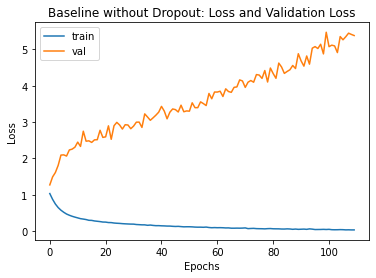

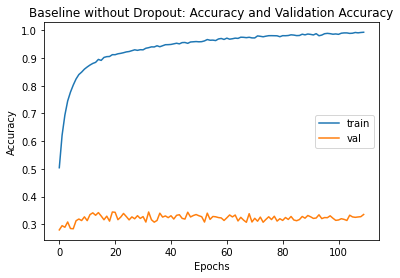

In [ ]:
# Making plots
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.title('Baseline without Dropout: Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.show()

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.title('Baseline without Dropout: Accuracy and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.show()

### **STEP 10: DL Modeling - DNN with Dropout**


In [ ]:
## Multilayer Dropout model (DNN with Dropout)
def multilayer_dropout_model():
  # create model
  model = Sequential()
  model.add(Dense(64, input_dim=40, activation='relu'))
  model.add(Dropout(0.05))
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.05))
  model.add(Dense(3, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

multilayer_dropout_model()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                2624      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 387       
Total params: 11,331
Trainable params: 11,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dropout_model = KerasClassifier(build_fn=multilayer_dropout_model, epochs=110, batch_size=50)

In [ ]:
hist = dropout_model.fit(X_train, dummy_y_train, validation_data=(X_test, dummy_y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                2624      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 387       
Total params: 11,331
Trainable params: 11,331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/110
183/183 [==============================] - 2s 5ms/step - loss: 1.0722 - accuracy: 0.4234 - val_loss: 1.

In [ ]:
drop_predictions = dropout_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
sum(y_test == drop_predictions)

1320

In [ ]:
(sum(y_test == drop_predictions)/len(y_test))*100

28.852459016393446

In [ ]:
print(classification_report(y_test, drop_predictions))

              precision    recall  f1-score   support

           0       0.28      0.29      0.28      1525
           1       0.29      0.42      0.34      1525
           2       0.31      0.16      0.21      1525

    accuracy                           0.29      4575
   macro avg       0.29      0.29      0.28      4575
weighted avg       0.29      0.29      0.28      4575



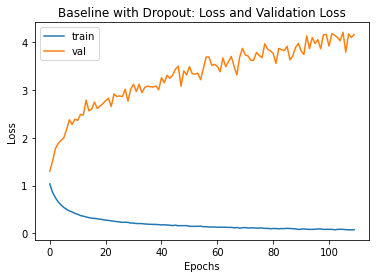

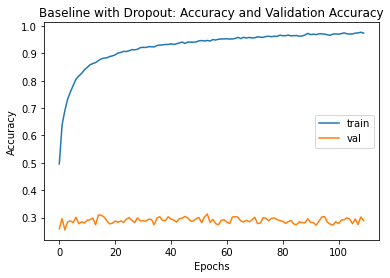

In [ ]:
# Making plots
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.title('Baseline with Dropout: Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.show()

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.title('Baseline with Dropout: Accuracy and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.show()